In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [159]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [139]:
df = pd.read_csv("/content/house-votes-84.csv")
df.head()

,Party,Handicapped-infants,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Crime,Duty-free-exports,Export-administration-act-south-africa
0,REP,NaN,y,n,y,y,y,n,n,n,y,?,y,y,NaN,n,y
1,Republican,NaN,y,n,y,y,y,n,n,n,n,n,y,y,NaN,n,?
2,DEM,NaN,y,y,?,y,y,n,n,n,n,y,n,y,NaN,n,n
3,DEM,NaN,y,y,n,?,y,n,n,n,n,y,n,y,NaN,n,y
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df.nunique()

,0
Party,6
Handicapped-infants,3
Water-project-cost-sharing,3
Adoption-of-the-budget-resolution,3
Physician-fee-freeze,3
El-salvador-aid,3
Religious-groups-in-schools,3
Anti-satellite-test-ban,3
Aid-to-nicaraguan-contras,3
MX-missile,3


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Party                                   414 non-null    object 
 1   Handicapped-infants                     25 non-null     float64
 2   Water-project-cost-sharing              414 non-null    object 
 3   Adoption-of-the-budget-resolution       414 non-null    object 
 4   Physician-fee-freeze                    414 non-null    object 
 5   El-salvador-aid                         414 non-null    object 
 6   Religious-groups-in-schools             414 non-null    object 
 7   Anti-satellite-test-ban                 414 non-null    object 
 8   Aid-to-nicaraguan-contras               414 non-null    object 
 9   MX-missile                              414 non-null    object 
 10  Immigration                             414 non-null    object

In [142]:
df.isnull().sum()

,0
Party,43
Handicapped-infants,432
Water-project-cost-sharing,43
Adoption-of-the-budget-resolution,43
Physician-fee-freeze,43
El-salvador-aid,43
Religious-groups-in-schools,43
Anti-satellite-test-ban,43
Aid-to-nicaraguan-contras,43
MX-missile,43


In [143]:
df.drop(columns=['Crime', 'Handicapped-infants'], inplace=True)

In [144]:
x = df.duplicated()
df[x]

,Party,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Duty-free-exports,Export-administration-act-south-africa
27,DEM,y,y,n,n,n,y,y,y,n,y,n,n,y,y
33,REP,y,n,y,y,y,n,n,n,n,n,y,y,n,y
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,REP,n,n,y,y,y,n,n,n,n,n,y,y,n,y
447,DEM,n,y,n,n,n,y,y,y,y,n,n,n,y,y
452,Democrat,n,y,n,y,y,n,n,n,n,n,n,n,n,y
453,Republican,n,y,y,y,n,y,n,y,y,n,n,y,n,y


In [145]:
df.drop_duplicates(inplace=True,keep=False)

In [146]:
df['El-salvador-aid'].isna().sum()

np.int64(0)

In [147]:
x = df['El-salvador-aid'].isna()
df[x]

,Party,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Duty-free-exports,Export-administration-act-south-africa


In [148]:
df.shape

(294, 15)

In [149]:
df.reset_index(inplace=True)

In [150]:
df.head()

,index,Party,Water-project-cost-sharing,Adoption-of-the-budget-resolution,Physician-fee-freeze,El-salvador-aid,Religious-groups-in-schools,Anti-satellite-test-ban,Aid-to-nicaraguan-contras,MX-missile,Immigration,Synfuels-corporation-cutback,Education-spending,Superfund-right-to-sue,Duty-free-exports,Export-administration-act-south-africa
0,0,REP,y,n,y,y,y,n,n,n,y,?,y,y,n,y
1,1,Republican,y,n,y,y,y,n,n,n,n,n,y,y,n,?
2,2,DEM,y,y,?,y,y,n,n,n,n,y,n,y,n,n
3,3,DEM,y,y,n,?,y,n,n,n,n,y,n,y,n,y
4,5,demo,y,y,n,y,y,n,n,n,n,n,n,y,y,y


In [151]:
df.drop(['index'], axis=1, inplace=True)

In [152]:
df['Party'].unique()

array(['REP', 'Republican', 'DEM', 'demo', 'repub', 'Democrat'],
      dtype=object)

In [153]:
df.replace({'REP' : 'Republican', 'repub' : 'Republican', 'DEM' : 'Democrat', 'demo' : 'Democrat'}, inplace=True)

In [154]:
df['Party'].value_counts()

,count
Party,
Democrat,190
Republican,104


In [155]:
df.replace({'y' : 1, 'n' : 0}, inplace=True)

In [156]:
df.replace('?', 'unknown', inplace=True)

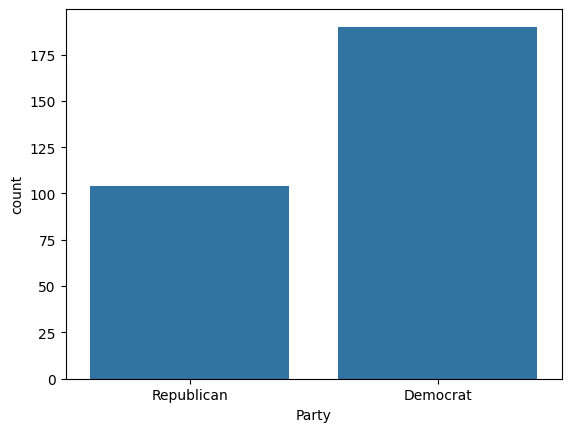

,proportion
Party,
Democrat,0.646259
Republican,0.353741


In [158]:
sns.countplot(data=df,
              x='Party')
plt.show()
display(df['Party'].value_counts(normalize=True))

In [160]:
! pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.1 MB/s eta 0:00:00


In [162]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols = df.drop('Party', axis=1).columns, return_df=True)
df_encoded = encoder.fit_transform(df)

In [180]:
df_encoded.nunique()

,0
Party,2
Water-project-cost-sharing_0,2
Water-project-cost-sharing_1,2
Adoption-of-the-budget-resolution_0,2
Adoption-of-the-budget-resolution_1,2
Physician-fee-freeze_0,2
Physician-fee-freeze_1,2
El-salvador-aid_0,2
El-salvador-aid_1,2
Religious-groups-in-schools_0,2


In [171]:
df_encoded.replace({'Republican' : 1, 'Democrat' : 0}, inplace=True)

In [181]:
X = df_encoded.drop('Party', axis=1)
y = df_encoded['Party']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [183]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [184]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [187]:
y_pred = lr.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.9322033898305084


In [188]:
y_pred_train = lr.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

0.9531914893617022


In [191]:
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9152542372881356


In [192]:
y_pred_train = svm.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

0.9829787234042553


In [195]:
from xgboost import XGBClassifier

In [196]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [197]:
y_pred = xgboost.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.9322033898305084


In [199]:
y_pred_train = xgboost.predict(X_train)

print(accuracy_score(y_train, y_pred_train))

0.9957446808510638
